<center><h1 Style="color:#2E8B57">PROYECTO MACHINE LEARNING - BANCO UNO </h1></center>
<center><h5> Universidad Castro Carazo</h5></center>
<center><h6> Estudiante: Meizon Sanchez</h6></center>
</br>

In [1]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression


In [2]:
connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
user='deepAnalytics',
password='Sqltask1234!',
database='Credit',
charset='utf8mb4',
cursorclass=pymysql.cursors.DictCursor)

In [3]:
df = pd.read_sql('SELECT * FROM credit', con=connection)

C:\Users\Meizon Sanchez\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
df. to_csv ( 'BancoUno.csv' , header = False , index = False )

In [5]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [6]:
df.tail(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
3665,220000,female,university,1,32,0,0,0,0,0,...,208355,213015,217475,7200,9000,10000,8000,8010,8500,not default
3666,70000,female,university,2,34,1,2,2,2,0,...,26456,28361,31873,1500,2900,0,2500,4000,0,not default
3667,120000,male,university,2,37,-1,2,0,0,0,...,17901,19608,19143,1000,1600,800,2000,0,1600,default
3668,180000,female,university,2,32,0,0,0,0,0,...,31057,29052,25933,1582,30000,1000,1000,1000,1000,not default
3669,50000,female,high school,1,57,0,0,0,0,0,...,48319,48449,49656,2500,2000,2000,1746,2000,1800,not default


In [7]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,3670,3670,3670,3670,3670,3670,3670,3670,3670,3670,...,3670,3670,3670,3670,3670,3670,3670,3670,3670,3670
unique,63,3,5,5,53,10,11,11,10,9,...,2009,1984,1948,1147,1130,1041,1035,1039,971,3
top,50000,female,university,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not default
freq,453,2130,1644,2045,214,1741,1901,1875,1995,1996,...,424,460,532,667,708,798,808,827,949,2873


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3670 entries, 0 to 3669
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      3670 non-null   object
 1   X2      3670 non-null   object
 2   X3      3670 non-null   object
 3   X4      3670 non-null   object
 4   X5      3670 non-null   object
 5   X6      3670 non-null   object
 6   X7      3670 non-null   object
 7   X8      3670 non-null   object
 8   X9      3670 non-null   object
 9   X10     3670 non-null   object
 10  X11     3670 non-null   object
 11  X12     3670 non-null   object
 12  X13     3670 non-null   object
 13  X14     3670 non-null   object
 14  X15     3670 non-null   object
 15  X16     3670 non-null   object
 16  X17     3670 non-null   object
 17  X18     3670 non-null   object
 18  X19     3670 non-null   object
 19  X20     3670 non-null   object
 20  X21     3670 non-null   object
 21  X22     3670 non-null   object
 22  X23     3670 non-null   

In [9]:
df.shape

(3670, 24)

In [10]:
df.columns.values

array(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'], dtype=object)

In [11]:
credit = df

In [12]:
credit.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [13]:
credit.describe(include = 'all')

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,3670,3670,3670,3670,3670,3670,3670,3670,3670,3670,...,3670,3670,3670,3670,3670,3670,3670,3670,3670,3670
unique,63,3,5,5,53,10,11,11,10,9,...,2009,1984,1948,1147,1130,1041,1035,1039,971,3
top,50000,female,university,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not default
freq,453,2130,1644,2045,214,1741,1901,1875,1995,1996,...,424,460,532,667,708,798,808,827,949,2873


In [14]:
import pandas_profiling

In [15]:
pandas_profiling.ProfileReport(credit)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
credit.rename({'X2': 'Genero'}, axis=1, inplace=True)

In [17]:
credit.rename({'X3': 'Educacion'}, axis=1, inplace=True)

In [18]:
credit.rename({'X1': 'Credito','X4': 'Estado Civil','X5': 'Edad','X6': 'HPS05','X7': 'HPA05','X8': 'HPJL05', 'X9': 'HPJN05','X10': 'HPMY05','X11': 'HPABR05', 'X12': 'MFSEP05', 'X13': 'MFAGOS05','X14': 'MFJUL05','X15': 'MFJUN05','X16': 'MFMAY05','X17': 'MFABR05','X18': 'MPA_SEP05','X19': 'MPA_AGOS05','X20': 'MPA_JUN05','X21': 'MPA_JUL05','X22': 'MPA_MAY05','X23': 'MPA_ABR05',  }, axis=1, inplace=True)

In [19]:
credit.head(5)

,Credito,Genero,Educacion,Estado Civil,Edad,HPS05,HPA05,HPJL05,HPJN05,HPMY05,...,MFJUN05,MFMAY05,MFABR05,MPA_SEP05,MPA_AGOS05,MPA_JUN05,MPA_JUL05,MPA_MAY05,MPA_ABR05,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [20]:
credit.dtypes

Credito         object
Genero          object
Educacion       object
Estado Civil    object
Edad            object
HPS05           object
HPA05           object
HPJL05          object
HPJN05          object
HPMY05          object
HPABR05         object
MFSEP05         object
MFAGOS05        object
MFJUL05         object
MFJUN05         object
MFMAY05         object
MFABR05         object
MPA_SEP05       object
MPA_AGOS05      object
MPA_JUN05       object
MPA_JUL05       object
MPA_MAY05       object
MPA_ABR05       object
Y               object
dtype: object

In [21]:
credit.drop([0])

,Credito,Genero,Educacion,Estado Civil,Edad,HPS05,HPA05,HPJL05,HPJN05,HPMY05,...,MFJUN05,MFMAY05,MFABR05,MPA_SEP05,MPA_AGOS05,MPA_JUN05,MPA_JUL05,MPA_MAY05,MPA_ABR05,Y
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,220000,female,university,1,32,0,0,0,0,0,...,208355,213015,217475,7200,9000,10000,8000,8010,8500,not default
3666,70000,female,university,2,34,1,2,2,2,0,...,26456,28361,31873,1500,2900,0,2500,4000,0,not default
3667,120000,male,university,2,37,-1,2,0,0,0,...,17901,19608,19143,1000,1600,800,2000,0,1600,default
3668,180000,female,university,2,32,0,0,0,0,0,...,31057,29052,25933,1582,30000,1000,1000,1000,1000,not default


In [22]:
credit.head(10)

,Credito,Genero,Educacion,Estado Civil,Edad,HPS05,HPA05,HPJL05,HPJN05,HPMY05,...,MFJUN05,MFMAY05,MFABR05,MPA_SEP05,MPA_AGOS05,MPA_JUN05,MPA_JUL05,MPA_MAY05,MPA_ABR05,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
6,50000,male,graduate school,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,not default
7,500000,male,graduate school,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,not default
8,100000,female,university,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,not default
9,140000,female,high school,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,not default


In [23]:
credit.isnull()

,Credito,Genero,Educacion,Estado Civil,Edad,HPS05,HPA05,HPJL05,HPJN05,HPMY05,...,MFJUN05,MFMAY05,MFABR05,MPA_SEP05,MPA_AGOS05,MPA_JUN05,MPA_JUL05,MPA_MAY05,MPA_ABR05,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3666,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3667,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3668,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
for column in credit.columns.values.tolist():
        print(column)
        print(credit[column].value_counts())
        print("")

Credito
50000      453
20000      236
30000      191
200000     182
80000      165
          ... 
610000       2
620000       2
430000       1
540000       1
1000000      1
Name: Credito, Length: 63, dtype: int64

Genero
female    2130
male      1538
SEX          2
Name: Genero, dtype: int64

Educacion
university         1644
graduate school    1401
high school         596
other                27
EDUCATION             2
Name: Educacion, dtype: int64

Estado Civil
2           2045
1           1559
3             54
0             10
MARRIAGE       2
Name: Estado Civil, dtype: int64

Edad
29     214
27     185
30     174
26     158
24     155
32     152
34     151
28     147
31     145
35     135
33     134
36     133
25     131
37     129
23     124
38     115
40     107
39     100
41      97
22      90
42      88
43      84
44      74
46      66
49      64
47      58
48      54
45      52
53      44
50      43
51      41
52      39
54      34
56      28
55      25
57      23
58      16
5

In [25]:
credit.drop([0], axis=0, inplace=True)

credit.head(10)

,Credito,Genero,Educacion,Estado Civil,Edad,HPS05,HPA05,HPJL05,HPJN05,HPMY05,...,MFJUN05,MFMAY05,MFABR05,MPA_SEP05,MPA_AGOS05,MPA_JUN05,MPA_JUL05,MPA_MAY05,MPA_ABR05,Y
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
6,50000,male,graduate school,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,not default
7,500000,male,graduate school,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,not default
8,100000,female,university,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,not default
9,140000,female,high school,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,not default
10,20000,male,high school,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,not default


In [26]:
credit.head(10)

,Credito,Genero,Educacion,Estado Civil,Edad,HPS05,HPA05,HPJL05,HPJN05,HPMY05,...,MFJUN05,MFMAY05,MFABR05,MPA_SEP05,MPA_AGOS05,MPA_JUN05,MPA_JUL05,MPA_MAY05,MPA_ABR05,Y
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
6,50000,male,graduate school,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,not default
7,500000,male,graduate school,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,not default
8,100000,female,university,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,not default
9,140000,female,high school,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,not default
10,20000,male,high school,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,not default


In [27]:
for column in credit.columns.values.tolist():
        print(column)
        print(credit[column].value_counts())
        print("")

Credito
50000        453
20000        236
30000        191
200000       182
80000        165
            ... 
610000         2
430000         1
540000         1
1000000        1
LIMIT_BAL      1
Name: Credito, Length: 63, dtype: int64

Genero
female    2130
male      1538
SEX          1
Name: Genero, dtype: int64

Educacion
university         1644
graduate school    1401
high school         596
other                27
EDUCATION             1
Name: Educacion, dtype: int64

Estado Civil
2           2045
1           1559
3             54
0             10
MARRIAGE       1
Name: Estado Civil, dtype: int64

Edad
29     214
27     185
30     174
26     158
24     155
32     152
34     151
28     147
31     145
35     135
33     134
36     133
25     131
37     129
23     124
38     115
40     107
39     100
41      97
22      90
42      88
43      84
44      74
46      66
49      64
47      58
48      54
45      52
53      44
50      43
51      41
52      39
54      34
56      28
55      25
5

In [28]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3669 entries, 1 to 3669
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Credito       3669 non-null   object
 1   Genero        3669 non-null   object
 2   Educacion     3669 non-null   object
 3   Estado Civil  3669 non-null   object
 4   Edad          3669 non-null   object
 5   HPS05         3669 non-null   object
 6   HPA05         3669 non-null   object
 7   HPJL05        3669 non-null   object
 8   HPJN05        3669 non-null   object
 9   HPMY05        3669 non-null   object
 10  HPABR05       3669 non-null   object
 11  MFSEP05       3669 non-null   object
 12  MFAGOS05      3669 non-null   object
 13  MFJUL05       3669 non-null   object
 14  MFJUN05       3669 non-null   object
 15  MFMAY05       3669 non-null   object
 16  MFABR05       3669 non-null   object
 17  MPA_SEP05     3669 non-null   object
 18  MPA_AGOS05    3669 non-null   object
 19  MPA_JU

In [29]:
credit.describe()

,Credito,Genero,Educacion,Estado Civil,Edad,HPS05,HPA05,HPJL05,HPJN05,HPMY05,...,MFJUN05,MFMAY05,MFABR05,MPA_SEP05,MPA_AGOS05,MPA_JUN05,MPA_JUL05,MPA_MAY05,MPA_ABR05,Y
count,3669,3669,3669,3669,3669,3669,3669,3669,3669,3669,...,3669,3669,3669,3669,3669,3669,3669,3669,3669,3669
unique,63,3,5,5,53,10,11,11,10,9,...,2009,1984,1948,1147,1130,1041,1035,1039,971,3
top,50000,female,university,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not default
freq,453,2130,1644,2045,214,1741,1901,1875,1995,1996,...,424,460,532,667,708,798,808,827,949,2873


In [30]:
credit['Edad'].nunique()

53

In [31]:
credit['Edad'].count()

3669

In [32]:
credit.isnull().sum()

Credito         0
Genero          0
Educacion       0
Estado Civil    0
Edad            0
HPS05           0
HPA05           0
HPJL05          0
HPJN05          0
HPMY05          0
HPABR05         0
MFSEP05         0
MFAGOS05        0
MFJUL05         0
MFJUN05         0
MFMAY05         0
MFABR05         0
MPA_SEP05       0
MPA_AGOS05      0
MPA_JUN05       0
MPA_JUL05       0
MPA_MAY05       0
MPA_ABR05       0
Y               0
dtype: int64

In [33]:
credit.Edad =credit.Edad.replace({"AGE": "NULO"})

In [34]:
for column in credit.columns.values.tolist():
        print(column)
        print(credit[column].value_counts())
        print("")

Credito
50000        453
20000        236
30000        191
200000       182
80000        165
            ... 
610000         2
430000         1
540000         1
1000000        1
LIMIT_BAL      1
Name: Credito, Length: 63, dtype: int64

Genero
female    2130
male      1538
SEX          1
Name: Genero, dtype: int64

Educacion
university         1644
graduate school    1401
high school         596
other                27
EDUCATION             1
Name: Educacion, dtype: int64

Estado Civil
2           2045
1           1559
3             54
0             10
MARRIAGE       1
Name: Estado Civil, dtype: int64

Edad
29      214
27      185
30      174
26      158
24      155
32      152
34      151
28      147
31      145
35      135
33      134
36      133
25      131
37      129
23      124
38      115
40      107
39      100
41       97
22       90
42       88
43       84
44       74
46       66
49       64
47       58
48       54
45       52
53       44
50       43
51       41
52       39
54

In [35]:
credit.Genero =credit.Genero.replace({"SEX": "NULO"})

In [36]:
credit.Educacion =credit.Educacion.replace({"EDUCATION": "NULO"})

In [37]:
credit.Credito =credit.Credito.replace({"LIMIT_BAL": "NULO"})

In [38]:
for column in credit.columns.values.tolist():
        print(column)
        print(credit[column].value_counts())
        print("")

Credito
50000      453
20000      236
30000      191
200000     182
80000      165
          ... 
610000       2
430000       1
540000       1
1000000      1
NULO         1
Name: Credito, Length: 63, dtype: int64

Genero
female    2130
male      1538
NULO         1
Name: Genero, dtype: int64

Educacion
university         1644
graduate school    1401
high school         596
other                27
NULO                  1
Name: Educacion, dtype: int64

Estado Civil
2           2045
1           1559
3             54
0             10
MARRIAGE       1
Name: Estado Civil, dtype: int64

Edad
29      214
27      185
30      174
26      158
24      155
32      152
34      151
28      147
31      145
35      135
33      134
36      133
25      131
37      129
23      124
38      115
40      107
39      100
41       97
22       90
42       88
43       84
44       74
46       66
49       64
47       58
48       54
45       52
53       44
50       43
51       41
52       39
54       34
56       28


In [39]:
# Verificar si hay datos faltantes por columna
df.isnull().any()


Credito         False
Genero          False
Educacion       False
Estado Civil    False
Edad            False
HPS05           False
HPA05           False
HPJL05          False
HPJN05          False
HPMY05          False
HPABR05         False
MFSEP05         False
MFAGOS05        False
MFJUL05         False
MFJUN05         False
MFMAY05         False
MFABR05         False
MPA_SEP05       False
MPA_AGOS05      False
MPA_JUN05       False
MPA_JUL05       False
MPA_MAY05       False
MPA_ABR05       False
Y               False
dtype: bool

In [40]:
credit.dropna()

,Credito,Genero,Educacion,Estado Civil,Edad,HPS05,HPA05,HPJL05,HPJN05,HPMY05,...,MFJUN05,MFMAY05,MFABR05,MPA_SEP05,MPA_AGOS05,MPA_JUN05,MPA_JUL05,MPA_MAY05,MPA_ABR05,Y
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,220000,female,university,1,32,0,0,0,0,0,...,208355,213015,217475,7200,9000,10000,8000,8010,8500,not default
3666,70000,female,university,2,34,1,2,2,2,0,...,26456,28361,31873,1500,2900,0,2500,4000,0,not default
3667,120000,male,university,2,37,-1,2,0,0,0,...,17901,19608,19143,1000,1600,800,2000,0,1600,default
3668,180000,female,university,2,32,0,0,0,0,0,...,31057,29052,25933,1582,30000,1000,1000,1000,1000,not default


In [41]:
df.isnull().any()


Credito         False
Genero          False
Educacion       False
Estado Civil    False
Edad            False
HPS05           False
HPA05           False
HPJL05          False
HPJN05          False
HPMY05          False
HPABR05         False
MFSEP05         False
MFAGOS05        False
MFJUL05         False
MFJUN05         False
MFMAY05         False
MFABR05         False
MPA_SEP05       False
MPA_AGOS05      False
MPA_JUN05       False
MPA_JUL05       False
MPA_MAY05       False
MPA_ABR05       False
Y               False
dtype: bool

In [42]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3669 entries, 1 to 3669
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Credito       3669 non-null   object
 1   Genero        3669 non-null   object
 2   Educacion     3669 non-null   object
 3   Estado Civil  3669 non-null   object
 4   Edad          3669 non-null   object
 5   HPS05         3669 non-null   object
 6   HPA05         3669 non-null   object
 7   HPJL05        3669 non-null   object
 8   HPJN05        3669 non-null   object
 9   HPMY05        3669 non-null   object
 10  HPABR05       3669 non-null   object
 11  MFSEP05       3669 non-null   object
 12  MFAGOS05      3669 non-null   object
 13  MFJUL05       3669 non-null   object
 14  MFJUN05       3669 non-null   object
 15  MFMAY05       3669 non-null   object
 16  MFABR05       3669 non-null   object
 17  MPA_SEP05     3669 non-null   object
 18  MPA_AGOS05    3669 non-null   object
 19  MPA_JU

In [43]:
for column in credit.columns.values.tolist():
        print(column)
        print(credit[column].value_counts())
        print("")

Credito
50000      453
20000      236
30000      191
200000     182
80000      165
          ... 
610000       2
430000       1
540000       1
1000000      1
NULO         1
Name: Credito, Length: 63, dtype: int64

Genero
female    2130
male      1538
NULO         1
Name: Genero, dtype: int64

Educacion
university         1644
graduate school    1401
high school         596
other                27
NULO                  1
Name: Educacion, dtype: int64

Estado Civil
2           2045
1           1559
3             54
0             10
MARRIAGE       1
Name: Estado Civil, dtype: int64

Edad
29      214
27      185
30      174
26      158
24      155
32      152
34      151
28      147
31      145
35      135
33      134
36      133
25      131
37      129
23      124
38      115
40      107
39      100
41       97
22       90
42       88
43       84
44       74
46       66
49       64
47       58
48       54
45       52
53       44
50       43
51       41
52       39
54       34
56       28


In [44]:
credit [credit ['Edad'] == 'NULO'].index [ 0 ]

2398

In [45]:
array_booleanos = credit['Edad'] == 'NULO'
print(array_booleanos)

1       False
2       False
3       False
4       False
5       False
        ...  
3665    False
3666    False
3667    False
3668    False
3669    False
Name: Edad, Length: 3669, dtype: bool


In [46]:
NULO = credit.loc[credit['Edad'] == 'NULO']
print(NULO)

     Credito Genero Educacion Estado Civil  Edad  HPS05  HPA05 HPJL05 HPJN05  \
2398    NULO   NULO      NULO     MARRIAGE  NULO  PAY_0  PAY_2  PAY_3  PAY_4   

     HPMY05  ...    MFJUN05    MFMAY05    MFABR05 MPA_SEP05 MPA_AGOS05  \
2398  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1   PAY_AMT2   

     MPA_JUN05 MPA_JUL05 MPA_MAY05 MPA_ABR05                           Y  
2398  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  

[1 rows x 24 columns]


In [47]:
credit.drop([2398], axis=0, inplace=True)

In [48]:
for column in credit.columns.values.tolist():
        print(column)
        print(credit[column].value_counts())
        print("")

Credito
50000      453
20000      236
30000      191
200000     182
80000      165
          ... 
700000       2
610000       2
430000       1
540000       1
1000000      1
Name: Credito, Length: 62, dtype: int64

Genero
female    2130
male      1538
Name: Genero, dtype: int64

Educacion
university         1644
graduate school    1401
high school         596
other                27
Name: Educacion, dtype: int64

Estado Civil
2    2045
1    1559
3      54
0      10
Name: Estado Civil, dtype: int64

Edad
29    214
27    185
30    174
26    158
24    155
32    152
34    151
28    147
31    145
35    135
33    134
36    133
25    131
37    129
23    124
38    115
40    107
39    100
41     97
22     90
42     88
43     84
44     74
46     66
49     64
47     58
48     54
45     52
53     44
50     43
51     41
52     39
54     34
56     28
55     25
57     23
58     16
59      9
60      8
21      7
61      6
66      6
67      5
63      4
62      3
75      2
73      2
70      2
65      2
72

In [49]:
credit.dtypes

Credito         object
Genero          object
Educacion       object
Estado Civil    object
Edad            object
HPS05           object
HPA05           object
HPJL05          object
HPJN05          object
HPMY05          object
HPABR05         object
MFSEP05         object
MFAGOS05        object
MFJUL05         object
MFJUN05         object
MFMAY05         object
MFABR05         object
MPA_SEP05       object
MPA_AGOS05      object
MPA_JUN05       object
MPA_JUL05       object
MPA_MAY05       object
MPA_ABR05       object
Y               object
dtype: object

In [50]:
credit['Edad'] =credit['Edad'].astype('int')
credit['Estado Civil'] =credit['Estado Civil'].astype('int')
credit.dtypes

Credito         object
Genero          object
Educacion       object
Estado Civil     int32
Edad             int32
HPS05           object
HPA05           object
HPJL05          object
HPJN05          object
HPMY05          object
HPABR05         object
MFSEP05         object
MFAGOS05        object
MFJUL05         object
MFJUN05         object
MFMAY05         object
MFABR05         object
MPA_SEP05       object
MPA_AGOS05      object
MPA_JUN05       object
MPA_JUL05       object
MPA_MAY05       object
MPA_ABR05       object
Y               object
dtype: object

In [51]:
credit['Credito'] =credit['Credito'].astype('int')
credit.dtypes

Credito          int32
Genero          object
Educacion       object
Estado Civil     int32
Edad             int32
HPS05           object
HPA05           object
HPJL05          object
HPJN05          object
HPMY05          object
HPABR05         object
MFSEP05         object
MFAGOS05        object
MFJUL05         object
MFJUN05         object
MFMAY05         object
MFABR05         object
MPA_SEP05       object
MPA_AGOS05      object
MPA_JUN05       object
MPA_JUL05       object
MPA_MAY05       object
MPA_ABR05       object
Y               object
dtype: object

In [52]:
credit['HPS05'] =credit['HPS05'].astype('int')
credit['HPA05'] =credit['HPA05'].astype('int')
credit['HPJL05'] =credit['HPJL05'].astype('int')
credit['HPJN05'] =credit['HPJN05'].astype('int')
credit['HPABR05'] =credit['HPABR05'].astype('int')
credit['HPMY05'] =credit['HPMY05'].astype('int')

credit['MFSEP05'] =credit['MFSEP05'].astype('int')
credit['MFAGOS05'] =credit['MFAGOS05'].astype('int')
credit['MFJUL05'] =credit['MFJUL05'].astype('int')
credit['MFJUN05'] =credit['MFJUN05'].astype('int')
credit['MFMAY05'] =credit['MFMAY05'].astype('int')
credit['MFABR05'] =credit['MFABR05'].astype('int')

credit['MPA_SEP05'] =credit['MPA_SEP05'].astype('int')
credit['MPA_AGOS05'] =credit['MPA_AGOS05'].astype('int')
credit['MPA_JUN05'] =credit['MPA_JUN05'].astype('int')
credit['MPA_JUL05'] =credit['MPA_JUL05'].astype('int')
credit['MPA_MAY05'] =credit['MPA_MAY05'].astype('int')
credit['MPA_ABR05'] =credit['MPA_ABR05'].astype('int')

credit.dtypes

Credito          int32
Genero          object
Educacion       object
Estado Civil     int32
Edad             int32
HPS05            int32
HPA05            int32
HPJL05           int32
HPJN05           int32
HPMY05           int32
HPABR05          int32
MFSEP05          int32
MFAGOS05         int32
MFJUL05          int32
MFJUN05          int32
MFMAY05          int32
MFABR05          int32
MPA_SEP05        int32
MPA_AGOS05       int32
MPA_JUN05        int32
MPA_JUL05        int32
MPA_MAY05        int32
MPA_ABR05        int32
Y               object
dtype: object

In [53]:
credit.columns

Index(['Credito', 'Genero', 'Educacion', 'Estado Civil', 'Edad', 'HPS05',
       'HPA05', 'HPJL05', 'HPJN05', 'HPMY05', 'HPABR05', 'MFSEP05', 'MFAGOS05',
       'MFJUL05', 'MFJUN05', 'MFMAY05', 'MFABR05', 'MPA_SEP05', 'MPA_AGOS05',
       'MPA_JUN05', 'MPA_JUL05', 'MPA_MAY05', 'MPA_ABR05', 'Y'],
      dtype='object')

In [54]:
credit.describe()

,Credito,Estado Civil,Edad,HPS05,HPA05,HPJL05,HPJN05,HPMY05,HPABR05,MFSEP05,...,MFJUL05,MFJUN05,MFMAY05,MFABR05,MPA_SEP05,MPA_AGOS05,MPA_JUN05,MPA_JUL05,MPA_MAY05,MPA_ABR05
count,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,...,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000
mean,166284.078517,1.584242,35.354144,0.000818,-0.136314,-0.154035,-0.254362,-0.267448,-0.293893,51054.570338,...,45602.332061,41468.667939,39896.160851,38776.507361,5573.842421,5131.465376,4723.536532,4828.569793,5093.688113,5188.718103
std,129512.155474,0.527139,9.438171,1.130073,1.207178,1.254604,1.183663,1.164964,1.190039,76373.892061,...,69402.888549,67774.636553,63815.838564,64744.764598,13736.634262,14581.832680,19414.123480,13764.721810,17400.958215,20925.169595
min,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,...,-9850.000000,-7905.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3096.000000,...,2252.000000,1741.500000,1480.500000,981.500000,1000.000000,495.000000,240.000000,231.500000,214.250000,0.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21148.000000,...,19505.000000,17915.000000,17616.000000,15837.500000,2145.000000,1972.500000,1394.500000,1500.000000,1500.000000,1338.000000
75%,230000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63638.750000,...,56272.750000,49324.000000,48449.000000,47550.000000,5006.000000,4913.000000,4000.000000,4000.000000,4000.000000,4000.000000
max,1000000.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,964511.000000,...,548020.000000,891586.000000,927171.000000,961664.000000,239104.000000,285138.000000,896040.000000,205000.000000,332000.000000,528666.000000


In [55]:
gf1 =credit.groupby(['Genero']).count()
#Se extrae el indice y la primera columna con datos
gf1 = gf1.iloc[:,:1]
gf1

,Credito
Genero,
female,2130
male,1538


In [56]:
gf2 =credit.groupby(['Estado Civil']).count()
#Se extrae el indice y la primera columna con datos
gf2 = gf2.iloc[:,:1]
gf2

,Credito
Estado Civil,
0,10
1,1559
2,2045
3,54


Text(0.5, 1.0, 'Edad')

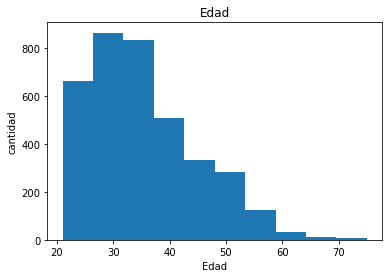

In [57]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot



plt.pyplot.hist(credit["Edad"])



plt.pyplot.xlabel("Edad")
plt.pyplot.ylabel("cantidad")
plt.pyplot.title("Edad")

Text(0.5, 1.0, 'Genero')

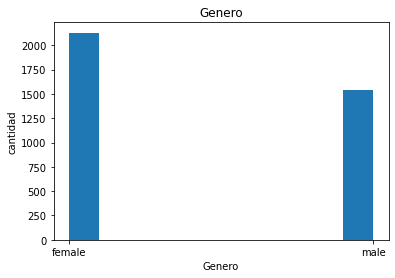

In [58]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot



plt.pyplot.hist(credit["Genero"])



plt.pyplot.xlabel("Genero")
plt.pyplot.ylabel("cantidad")
plt.pyplot.title("Genero")

In [59]:
credit.columns

Index(['Credito', 'Genero', 'Educacion', 'Estado Civil', 'Edad', 'HPS05',
       'HPA05', 'HPJL05', 'HPJN05', 'HPMY05', 'HPABR05', 'MFSEP05', 'MFAGOS05',
       'MFJUL05', 'MFJUN05', 'MFMAY05', 'MFABR05', 'MPA_SEP05', 'MPA_AGOS05',
       'MPA_JUN05', 'MPA_JUL05', 'MPA_MAY05', 'MPA_ABR05', 'Y'],
      dtype='object')

Text(0.5, 1.0, 'Credito')

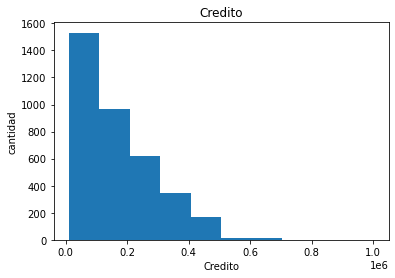

In [60]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot



plt.pyplot.hist(credit["Credito"])



plt.pyplot.xlabel("Credito")
plt.pyplot.ylabel("cantidad")
plt.pyplot.title("Credito")

credit=pd.get_dummies(credit)
credit.head(5)

In [61]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3668 entries, 1 to 3669
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Credito       3668 non-null   int32 
 1   Genero        3668 non-null   object
 2   Educacion     3668 non-null   object
 3   Estado Civil  3668 non-null   int32 
 4   Edad          3668 non-null   int32 
 5   HPS05         3668 non-null   int32 
 6   HPA05         3668 non-null   int32 
 7   HPJL05        3668 non-null   int32 
 8   HPJN05        3668 non-null   int32 
 9   HPMY05        3668 non-null   int32 
 10  HPABR05       3668 non-null   int32 
 11  MFSEP05       3668 non-null   int32 
 12  MFAGOS05      3668 non-null   int32 
 13  MFJUL05       3668 non-null   int32 
 14  MFJUN05       3668 non-null   int32 
 15  MFMAY05       3668 non-null   int32 
 16  MFABR05       3668 non-null   int32 
 17  MPA_SEP05     3668 non-null   int32 
 18  MPA_AGOS05    3668 non-null   int32 
 19  MPA_JU

credit = pd.get_dummies(credit)
credit.dtypes

In [62]:
import pandas as pd
import matplotlib.pyplot as plt


header = credit.dtypes.index
print(header)

Index(['Credito', 'Genero', 'Educacion', 'Estado Civil', 'Edad', 'HPS05',
       'HPA05', 'HPJL05', 'HPJN05', 'HPMY05', 'HPABR05', 'MFSEP05', 'MFAGOS05',
       'MFJUL05', 'MFJUN05', 'MFMAY05', 'MFABR05', 'MPA_SEP05', 'MPA_AGOS05',
       'MPA_JUN05', 'MPA_JUL05', 'MPA_MAY05', 'MPA_ABR05', 'Y'],
      dtype='object')


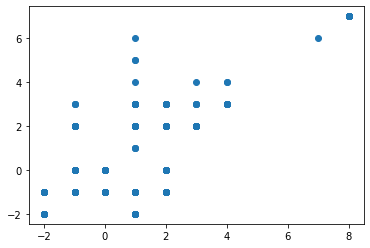

In [63]:
#Grafica de dispersion
x = credit['HPS05']

y = credit['HPA05']

plt.scatter(x,y)
plt.show()

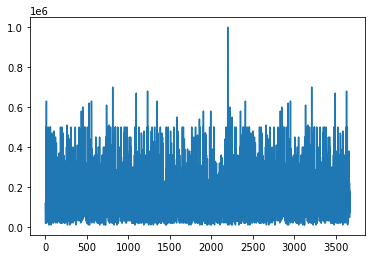

In [64]:
#Graficas de lineas
plt.plot(credit['Credito'])
plt.show()

In [65]:
corrMat = credit.corr()
print(corrMat)
#Correlacion

               Credito  Estado Civil      Edad     HPS05     HPA05    HPJL05  \
Credito       1.000000     -0.142109  0.158647 -0.193627 -0.245830 -0.236423   
Estado Civil -0.142109      1.000000 -0.421556  0.032158  0.043335  0.047459   
Edad          0.158647     -0.421556  1.000000 -0.023473 -0.038318 -0.044492   
HPS05        -0.193627      0.032158 -0.023473  1.000000  0.637960  0.547881   
HPA05        -0.245830      0.043335 -0.038318  0.637960  1.000000  0.758939   
HPJL05       -0.236423      0.047459 -0.044492  0.547881  0.758939  1.000000   
HPJN05       -0.227622      0.051615 -0.025743  0.495357  0.666219  0.812819   
HPMY05       -0.221567      0.046246 -0.012093  0.469966  0.637249  0.726717   
HPABR05      -0.220685      0.045129 -0.011538  0.440816  0.599671  0.669040   
MFSEP05       0.347138     -0.041317  0.063672  0.175302  0.229667  0.194960   
MFAGOS05      0.350444     -0.036592  0.058651  0.177932  0.232233  0.218501   
MFJUL05       0.356201     -0.046478  0.

In [66]:
covMat = credit.cov()
print(covMat)
#Covarianza

                   Credito  Estado Civil           Edad         HPS05  \
Credito       1.677340e+10  -9701.876264  193923.365696 -28338.928889   
Estado Civil -9.701876e+03      0.277875      -2.097336      0.019157   
Edad          1.939234e+05     -2.097336      89.079075     -0.250358   
HPS05        -2.833893e+04      0.019157      -0.250358      1.277065   
HPA05        -3.843413e+04      0.027576      -0.436577      0.870305   
HPJL05       -3.841546e+04      0.031387      -0.526836      0.776783   
HPJN05       -3.489418e+04      0.032206      -0.287588      0.662602   
HPMY05       -3.342932e+04      0.028400      -0.132966      0.618708   
HPABR05      -3.401303e+04      0.028310      -0.129597      0.592823   
MFSEP05       3.433660e+09  -1663.392483   45896.606526  15129.967900   
MFAGOS05      3.390528e+09  -1440.971928   41352.616115  15021.005487   
MFJUL05       3.201718e+09  -1700.400765   43332.647846  13865.821381   
MFJUN05       3.158359e+09  -1253.097462   36132.69

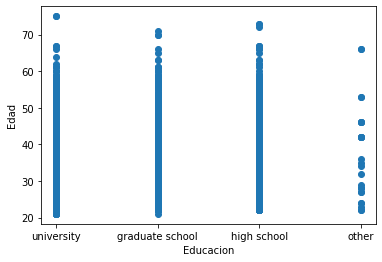

In [67]:
plt.scatter(credit["Educacion"],credit["Edad"])
plt.xlabel("Educacion")
plt.ylabel("Edad")
plt.show()

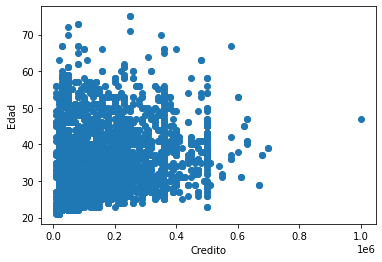

In [68]:
plt.scatter(credit["Credito"],credit["Edad"])
plt.xlabel("Credito")
plt.ylabel("Edad")
plt.show()

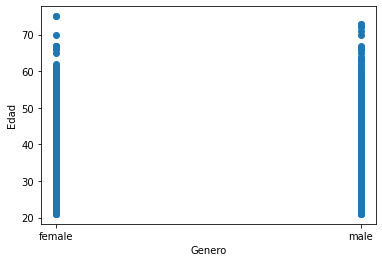

In [69]:
plt.scatter(credit["Genero"],credit["Edad"])
plt.xlabel("Genero")
plt.ylabel("Edad")
plt.show()

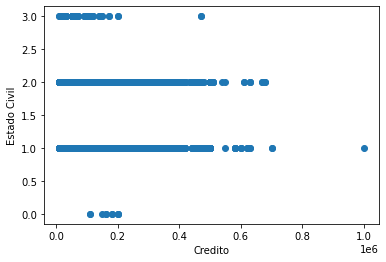

In [70]:
plt.scatter(credit["Credito"],credit["Estado Civil"])
plt.xlabel("Credito")
plt.ylabel("Estado Civil")
plt.show()

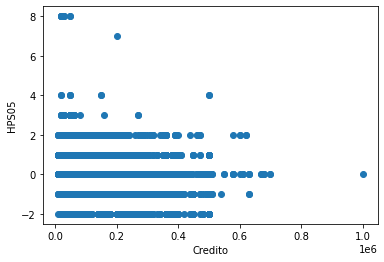

In [71]:
plt.scatter(credit["Credito"],credit["HPS05"])
plt.xlabel("Credito")
plt.ylabel("HPS05")
plt.show()

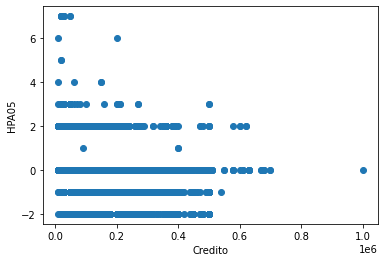

In [72]:
plt.scatter(credit["Credito"],credit["HPA05"])
plt.xlabel("Credito")
plt.ylabel("HPA05")
plt.show()

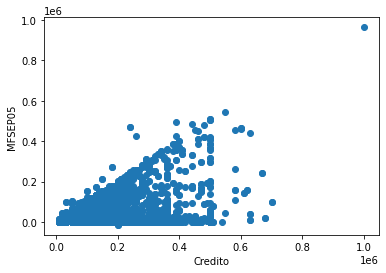

In [73]:
plt.scatter(credit["Credito"],credit["MFSEP05"])
plt.xlabel("Credito")
plt.ylabel("MFSEP05")
plt.show()

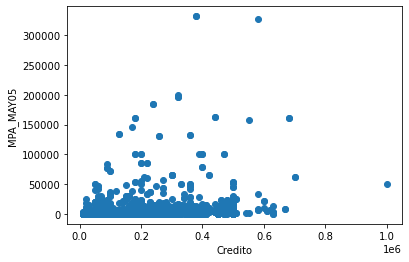

In [74]:
plt.scatter(credit["Credito"],credit["MPA_MAY05"])
plt.xlabel("Credito")
plt.ylabel("MPA_MAY05")
plt.show()

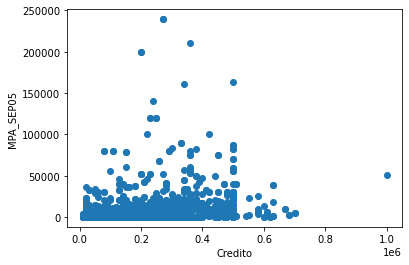

In [75]:
plt.scatter(credit["Credito"],credit["MPA_SEP05"])
plt.xlabel("Credito")
plt.ylabel("MPA_SEP05")
plt.show()

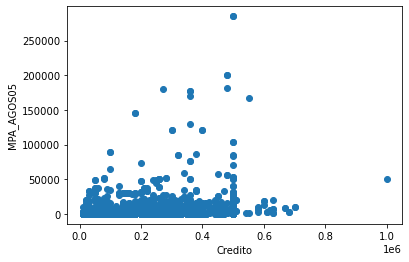

In [76]:
plt.scatter(credit["Credito"],credit["MPA_AGOS05"])
plt.xlabel("Credito")
plt.ylabel("MPA_AGOS05")
plt.show()

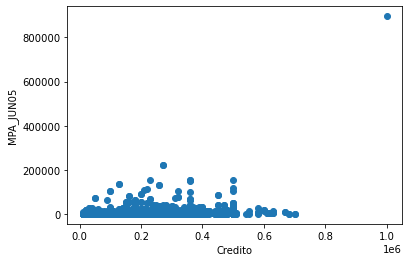

In [77]:
plt.scatter(credit["Credito"],credit["MPA_JUN05"])
plt.xlabel("Credito")
plt.ylabel("MPA_JUN05")
plt.show()

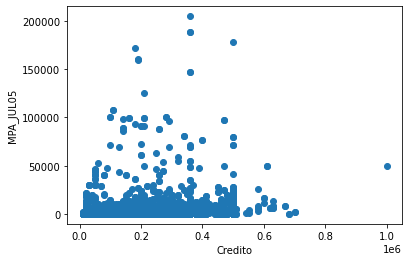

In [78]:
plt.scatter(credit["Credito"],credit["MPA_JUL05"])
plt.xlabel("Credito")
plt.ylabel("MPA_JUL05")
plt.show()

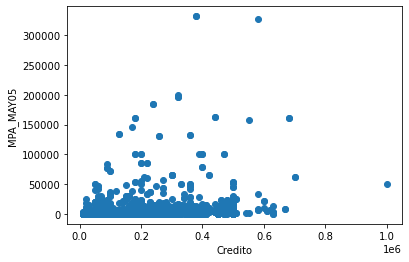

In [79]:
plt.scatter(credit["Credito"],credit["MPA_MAY05"])
plt.xlabel("Credito")
plt.ylabel("MPA_MAY05")
plt.show()

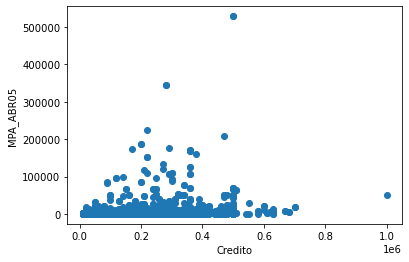

In [80]:
plt.scatter(credit["Credito"],credit["MPA_ABR05"])
plt.xlabel("Credito")
plt.ylabel("MPA_ABR05")
plt.show()

In [81]:
credit = pd.get_dummies(credit)

In [82]:
credit.head()

,Credito,Estado Civil,Edad,HPS05,HPA05,HPJL05,HPJN05,HPMY05,HPABR05,MFSEP05,...,MPA_MAY05,MPA_ABR05,Genero_female,Genero_male,Educacion_graduate school,Educacion_high school,Educacion_other,Educacion_university,Y_default,Y_not default
1,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,1,0,0,0,0,1,1,0
2,120000,2,26,-1,2,0,0,0,2,2682,...,0,2000,1,0,0,0,0,1,1,0
3,90000,2,34,0,0,0,0,0,0,29239,...,1000,5000,1,0,0,0,0,1,0,1
4,50000,1,37,0,0,0,0,0,0,46990,...,1069,1000,1,0,0,0,0,1,0,1
5,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,1,0,0,0,1,0,1


In [83]:
credit.corr(method="pearson")

,Credito,Estado Civil,Edad,HPS05,HPA05,HPJL05,HPJN05,HPMY05,HPABR05,MFSEP05,...,MPA_MAY05,MPA_ABR05,Genero_female,Genero_male,Educacion_graduate school,Educacion_high school,Educacion_other,Educacion_university,Y_default,Y_not default
Credito,1.000000,-0.142109,0.158647,-0.193627,-0.245830,-0.236423,-0.227622,-0.221567,-0.220685,0.347138,...,0.223146,0.203018,0.022378,-0.022378,0.228166,-0.139112,0.005180,-0.120615,-0.072486,0.072486
Estado Civil,-0.142109,1.000000,-0.421556,0.032158,0.043335,0.047459,0.051615,0.046246,0.045129,-0.041317,...,-0.031263,-0.014585,-0.038194,0.038194,0.145294,-0.113868,0.001364,-0.057720,-0.028212,0.028212
Edad,0.158647,-0.421556,1.000000,-0.023473,-0.038318,-0.044492,-0.025743,-0.012093,-0.011538,0.063672,...,0.031152,0.048908,-0.110087,0.110087,-0.106740,0.257490,0.023130,-0.090694,0.046870,-0.046870
HPS05,-0.193627,0.032158,-0.023473,1.000000,0.637960,0.547881,0.495357,0.469966,0.440816,0.175302,...,-0.038942,-0.067985,-0.033124,0.033124,-0.138128,0.053968,-0.005708,0.095897,0.286563,-0.286563
HPA05,-0.245830,0.043335,-0.038318,0.637960,1.000000,0.758939,0.666219,0.637249,0.599671,0.229667,...,-0.035705,-0.029622,-0.059347,0.059347,-0.194332,0.065051,-0.016699,0.144476,0.194264,-0.194264
HPJL05,-0.236423,0.047459,-0.044492,0.547881,0.758939,1.000000,0.812819,0.726717,0.669040,0.194960,...,-0.031099,-0.029293,-0.042240,0.042240,-0.164251,0.067636,-0.027563,0.115037,0.205956,-0.205956
HPJN05,-0.227622,0.051615,-0.025743,0.495357,0.666219,0.812819,1.000000,0.840000,0.744149,0.204609,...,-0.021649,-0.008397,-0.034176,0.034176,-0.154391,0.059073,-0.019220,0.110323,0.175675,-0.175675
HPMY05,-0.221567,0.046246,-0.012093,0.469966,0.637249,0.726717,0.840000,1.000000,0.816068,0.216483,...,-0.036838,-0.008541,-0.040477,0.040477,-0.128768,0.059259,-0.015823,0.084567,0.187245,-0.187245
HPABR05,-0.220685,0.045129,-0.011538,0.440816,0.599671,0.669040,0.744149,0.816068,1.000000,0.214237,...,-0.044457,-0.024159,-0.039936,0.039936,-0.139236,0.059104,-0.021617,0.095905,0.138826,-0.138826
MFSEP05,0.347138,-0.041317,0.063672,0.175302,0.229667,0.194960,0.204609,0.216483,0.214237,1.000000,...,0.206607,0.101415,-0.051954,0.051954,-0.014006,-0.009673,0.026482,0.016308,0.004646,-0.004646


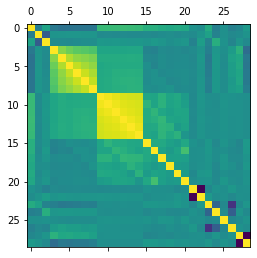

In [84]:
plt.matshow(credit.corr())

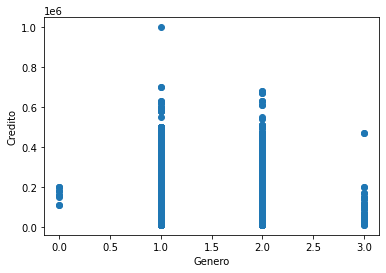

In [85]:
plt.scatter(credit["Estado Civil"],credit["Credito"])
plt.xlabel("Genero")
plt.ylabel("Credito")
plt.show()


#No es viable utilizar la variable "Y" para implementar un modelo de regresion lineal o multiple!

In [86]:
import seaborn as sns

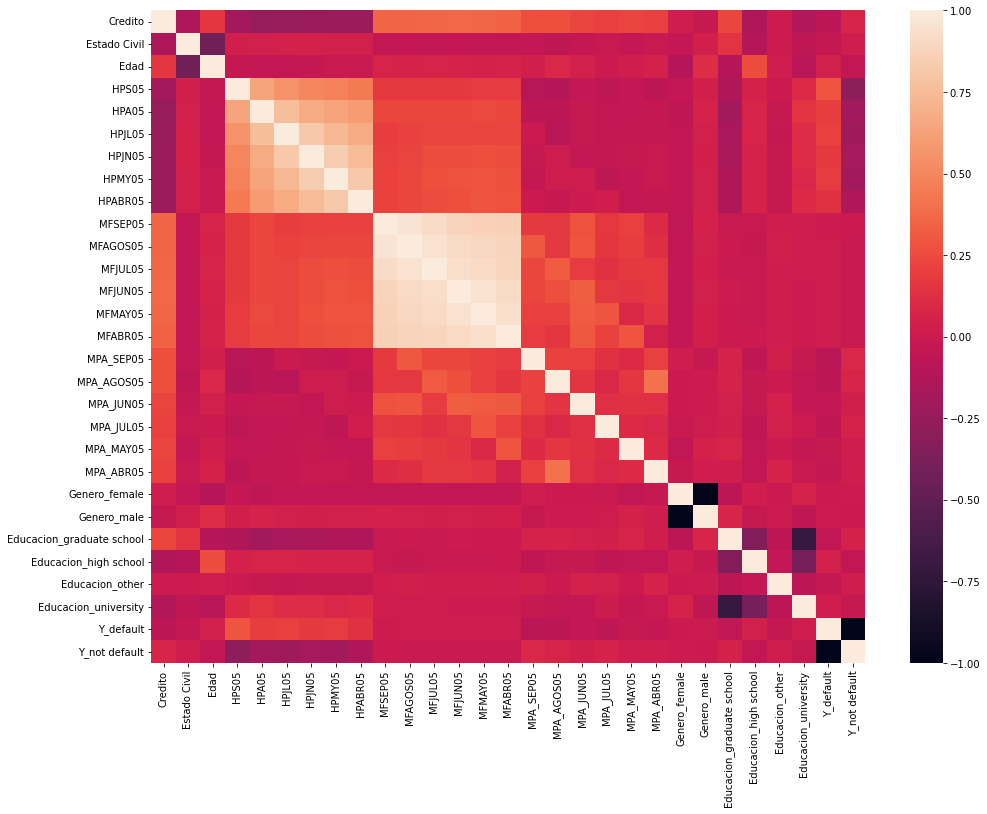

In [87]:
matrix = credit.corr()

plt.figure(figsize=(16,12))

_ = sns.heatmap(matrix)

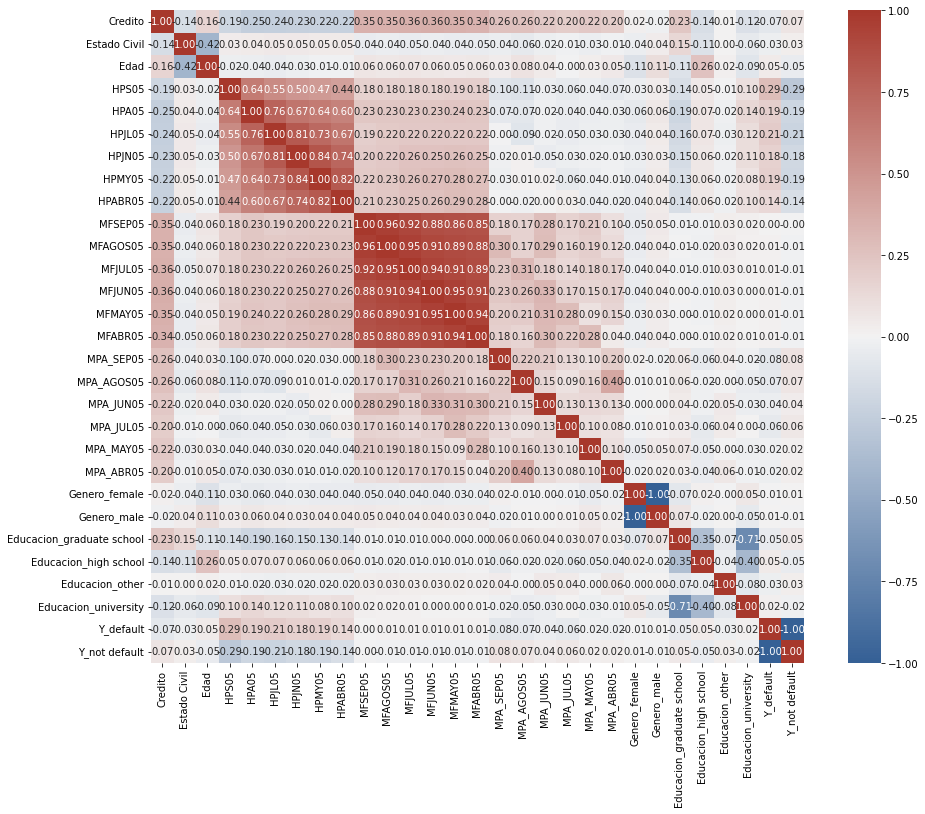

In [88]:
plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)

<AxesSubplot:>

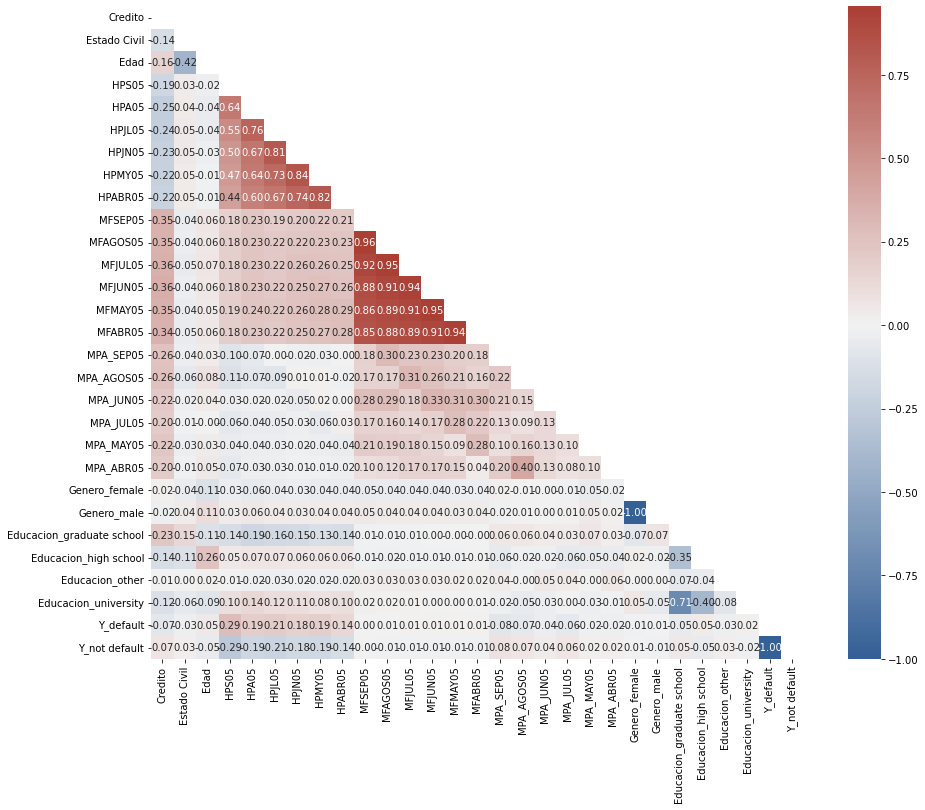

In [89]:
import numpy
plt.figure(figsize=(16,12))

mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

In [90]:
corcredit = credit.copy()

In [91]:
corcredit.head()

,Credito,Estado Civil,Edad,HPS05,HPA05,HPJL05,HPJN05,HPMY05,HPABR05,MFSEP05,...,MPA_MAY05,MPA_ABR05,Genero_female,Genero_male,Educacion_graduate school,Educacion_high school,Educacion_other,Educacion_university,Y_default,Y_not default
1,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,1,0,0,0,0,1,1,0
2,120000,2,26,-1,2,0,0,0,2,2682,...,0,2000,1,0,0,0,0,1,1,0
3,90000,2,34,0,0,0,0,0,0,29239,...,1000,5000,1,0,0,0,0,1,0,1
4,50000,1,37,0,0,0,0,0,0,46990,...,1069,1000,1,0,0,0,0,1,0,1
5,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,1,0,0,0,1,0,1


In [92]:
corcredit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3668 entries, 1 to 3669
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Credito                    3668 non-null   int32
 1   Estado Civil               3668 non-null   int32
 2   Edad                       3668 non-null   int32
 3   HPS05                      3668 non-null   int32
 4   HPA05                      3668 non-null   int32
 5   HPJL05                     3668 non-null   int32
 6   HPJN05                     3668 non-null   int32
 7   HPMY05                     3668 non-null   int32
 8   HPABR05                    3668 non-null   int32
 9   MFSEP05                    3668 non-null   int32
 10  MFAGOS05                   3668 non-null   int32
 11  MFJUL05                    3668 non-null   int32
 12  MFJUN05                    3668 non-null   int32
 13  MFMAY05                    3668 non-null   int32
 14  MFABR05                 

In [93]:
corcredit = corcredit.drop(["HPABR05","HPMY05","MFAGOS05","MFJUL05","MFJUN05","MFMAY05","MFABR05","HPJN05","HPJL05","Genero_male","Educacion_graduate school","Y_default"], axis=1)
corcredit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3668 entries, 1 to 3669
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Credito                3668 non-null   int32
 1   Estado Civil           3668 non-null   int32
 2   Edad                   3668 non-null   int32
 3   HPS05                  3668 non-null   int32
 4   HPA05                  3668 non-null   int32
 5   MFSEP05                3668 non-null   int32
 6   MPA_SEP05              3668 non-null   int32
 7   MPA_AGOS05             3668 non-null   int32
 8   MPA_JUN05              3668 non-null   int32
 9   MPA_JUL05              3668 non-null   int32
 10  MPA_MAY05              3668 non-null   int32
 11  MPA_ABR05              3668 non-null   int32
 12  Genero_female          3668 non-null   uint8
 13  Educacion_high school  3668 non-null   uint8
 14  Educacion_other        3668 non-null   uint8
 15  Educacion_university   3668 non-null  

<h5 Style='color: #008B8B'>Al momento de realizar la matriz y graficar, ingresé todos los valores que habia identificado como altas correlaciones, sin embargo, al correr el codigo luego de haber eliminado las variables correspondientes, me aparecieron otras dos correlaciones altas, que son "HPJN05" y "HPJL05".</h5>

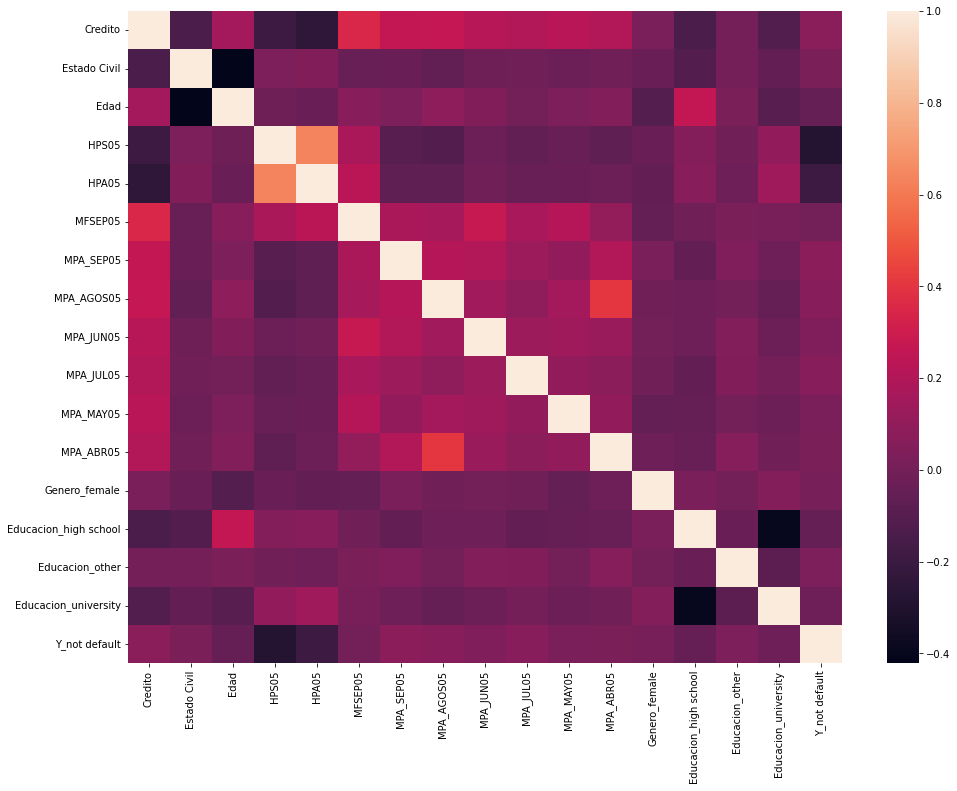

In [94]:
matrix = corcredit.corr()

plt.figure(figsize=(16,12))

_ = sns.heatmap(matrix)

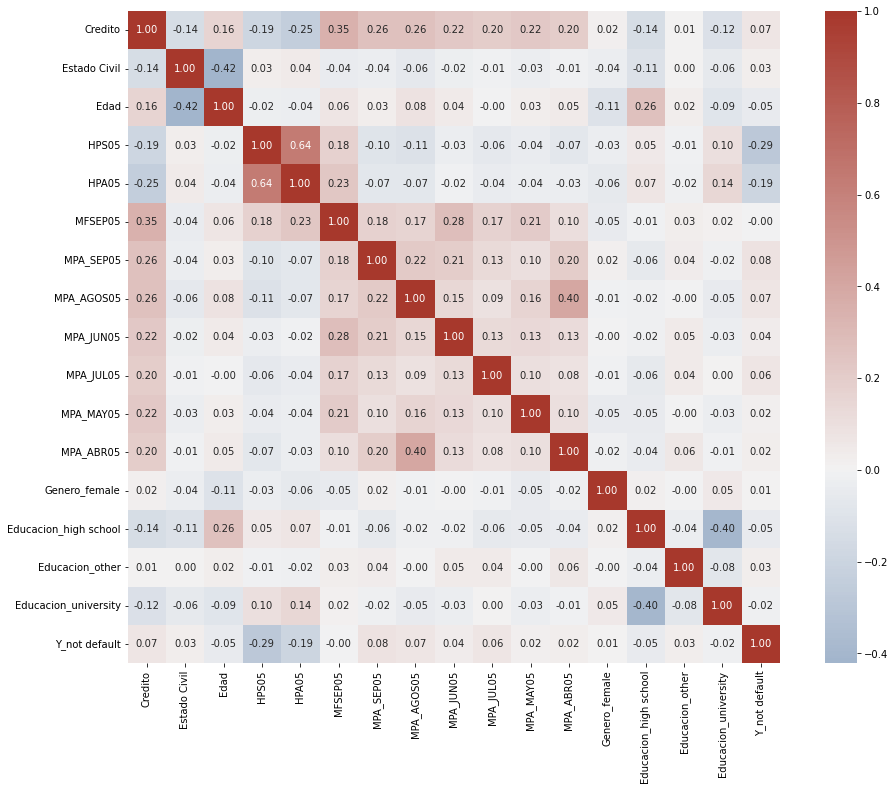

In [95]:
plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)

In [96]:
#Creando un nuevo dataframe para el modelo de Regresion Lineal simple
rlsce=corcredit[["Credito","Edad"]]
rlsce.head()

,Credito,Edad
1,20000,24
2,120000,26
3,90000,34
4,50000,37
5,50000,57


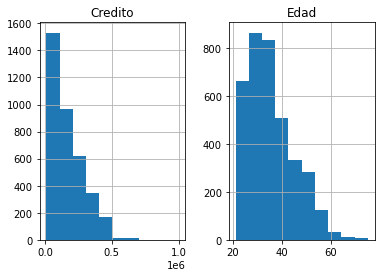

In [97]:
viz = rlsce[['Credito',"Edad"]]
viz.hist()
plt.show()

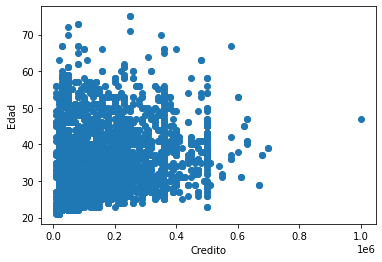

In [98]:
plt.scatter(credit["Credito"],credit["Edad"])
plt.xlabel("Credito")
plt.ylabel("Edad")
plt.show()

In [99]:
msk = np.random.rand(len(rlsce)) < 0.8 #Esto selecciona aleatoriamente el 80% de las observaciones y la amacena en msk
train = rlsce[msk] #aca se indica que el set de entrenamiento esta conformado por el 80% de las observaciones
test = rlsce[~msk] #aca se especifica que el set de prueba esta conformado por el 20% de la data restante.

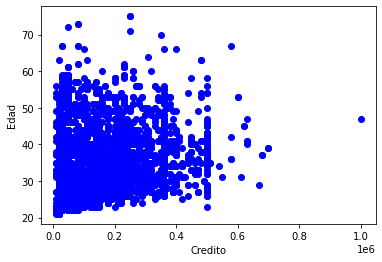

In [100]:
plt.scatter(train.Credito, train.Edad,  color='blue')
plt.xlabel("Credito")
plt.ylabel("Edad")
plt.show()

In [101]:
rlsce= linear_model.LinearRegression()
train_x = np.asanyarray(train[['Credito']])
train_y = np.asanyarray(train[['Edad']])
rlsce.fit(train_x, train_y)
# Obtener coeficientes de resultados, estos datos son informativos.
print ('Coefficients: ', rlsce.coef_)
print ('Intercept: ',rlsce.intercept_)

Coefficients:  [[1.18701213e-05]]
Intercept:  [33.32283105]


Text(0, 0.5, 'Edad')

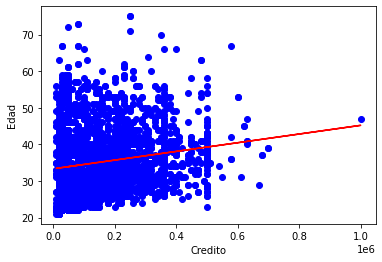

In [102]:
plt.scatter(train.Credito, train.Edad,  color='blue')
plt.plot(train_x, rlsce.coef_[0][0]*train_x + rlsce.intercept_[0], '-r')
plt.xlabel("Credito")
plt.ylabel("Edad")

In [103]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Credito']])
test_y = np.asanyarray(test[['Edad']])
test_y_ =rlsce.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 7.61
Residual sum of squares (MSE): 88.76
R2-score: 0.02


In [104]:
df = pd.DataFrame({'Actual': test_y.flatten(), 'Predicted': test_y_.flatten()})
df.head(10)

,Actual,Predicted
0,24,33.560233
1,26,34.747246
2,37,33.916337
3,35,33.560233
4,23,33.916337
5,49,37.121270
6,49,37.596075
7,39,34.865947
8,26,33.916337
9,58,39.257892


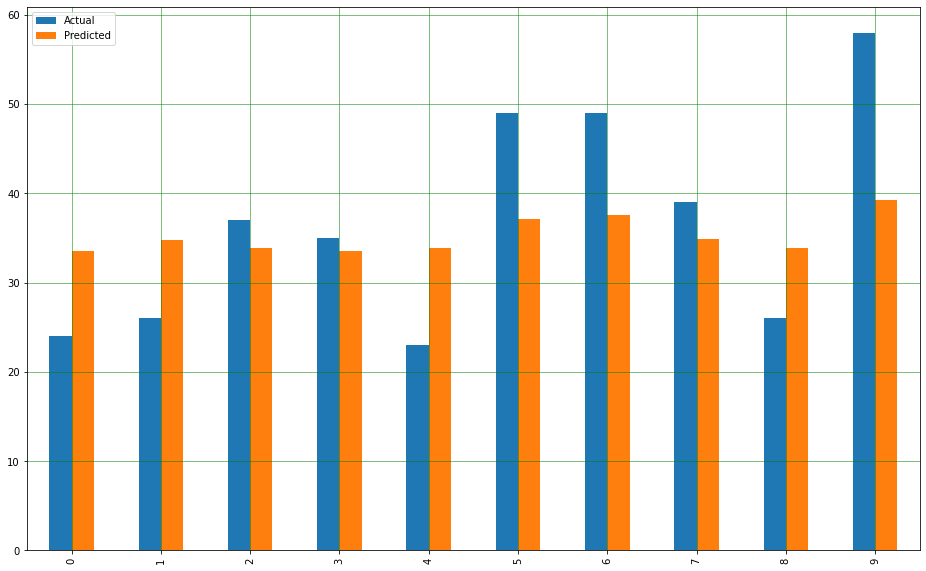

In [105]:
df1 = df.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [106]:
#Regresion lineal multiple

In [107]:
rlm = corcredit[["Credito","Edad","Estado Civil","HPS05","HPA05","MFSEP05","MPA_SEP05","MPA_AGOS05","MPA_JUN05","MPA_JUL05",
"MPA_MAY05","MPA_ABR05"]]
rlm.head(9)

,Credito,Edad,Estado Civil,HPS05,HPA05,MFSEP05,MPA_SEP05,MPA_AGOS05,MPA_JUN05,MPA_JUL05,MPA_MAY05,MPA_ABR05
1,20000,24,1,2,2,3913,0,689,0,0,0,0
2,120000,26,2,-1,2,2682,0,1000,1000,1000,0,2000
3,90000,34,2,0,0,29239,1518,1500,1000,1000,1000,5000
4,50000,37,1,0,0,46990,2000,2019,1200,1100,1069,1000
5,50000,57,1,-1,0,8617,2000,36681,10000,9000,689,679
6,50000,37,2,0,0,64400,2500,1815,657,1000,1000,800
7,500000,29,2,0,0,367965,55000,40000,38000,20239,13750,13770
8,100000,23,2,0,-1,11876,380,601,0,581,1687,1542
9,140000,28,1,0,0,11285,3329,0,432,1000,1000,1000


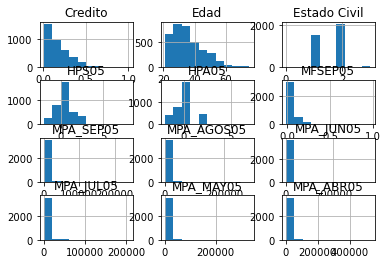

In [108]:
viz = rlm[["Credito","Edad","Estado Civil","HPS05","HPA05","MFSEP05","MPA_SEP05","MPA_AGOS05","MPA_JUN05","MPA_JUL05",
"MPA_MAY05","MPA_ABR05"]]
viz.hist()
plt.show()

In [109]:
msk = np.random.rand(len(rlm)) < 0.8 #Esto selecciona aleatoriamente el 80% de las observaciones y la amacena en msk
train = rlm[msk] #aca se indica que el set de entrenamiento esta conformado por el 80% de las observaciones
test = rlm[~msk] #aca se especifica que el set de prueba esta conformado por el 20% de la data restante.

In [110]:
from sklearn import linear_model
rlm = linear_model.LinearRegression()
x = np.asanyarray(train[["Edad","Estado Civil","HPS05","HPA05","MFSEP05","MPA_SEP05","MPA_AGOS05","MPA_JUN05","MPA_JUL05",
"MPA_MAY05","MPA_ABR05"]])
y = np.asanyarray(train[["Credito"]])
rlm.fit (x, y)
# The coefficients
print ('Coefficients: ',rlm.coef_)

Coefficients:  [[ 1.12072473e+03 -1.52345401e+04 -6.00463472e+03 -2.78907437e+04
   5.33107312e-01  9.94243339e-01  8.16497550e-01  3.55603995e-01
   7.59480678e-01  6.41051199e-01  4.72671054e-01]]


In [111]:
y_hat= rlm.predict(test[["Edad","Estado Civil","HPS05","HPA05","MFSEP05","MPA_SEP05","MPA_AGOS05","MPA_JUN05","MPA_JUL05",
"MPA_MAY05","MPA_ABR05"]])
x = np.asanyarray(test[["Edad","Estado Civil","HPS05","HPA05","MFSEP05","MPA_SEP05","MPA_AGOS05","MPA_JUN05","MPA_JUL05",
"MPA_MAY05","MPA_ABR05"]])
y = np.asanyarray(test[["Credito"]])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % rlm.score(x, y))



Residual sum of squares: 10943373215.53
Variance score: 0.34


C:\Users\Meizon Sanchez\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [112]:


df2 = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_hat.flatten()})
df2.head(10)



,Actual,Predicted
0,50000,157382.248429
1,50000,202379.774537
2,140000,127540.685679
3,70000,83976.633834
4,20000,109440.247947
5,50000,115844.517552
6,100000,167749.273619
7,50000,120252.814289
8,140000,171515.625099
9,20000,110897.013728


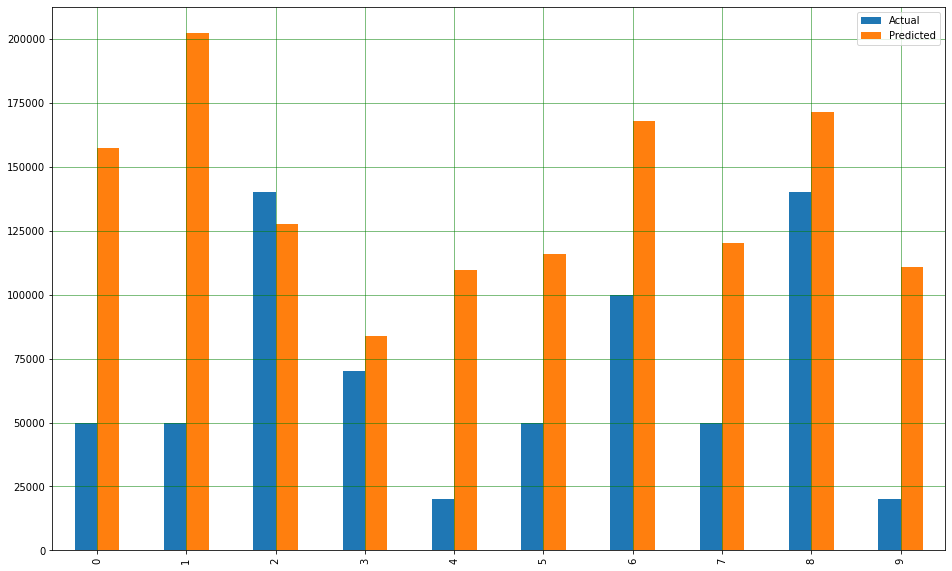

In [113]:
df3 = df2.head(10)
df3.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [114]:
#Regresion lineal multiple

In [115]:
rlm1 = corcredit[["Credito","MFSEP05","MPA_SEP05","MPA_AGOS05","MPA_JUN05","MPA_JUL05",
"MPA_MAY05","MPA_ABR05"]]
rlm1.head(10)

,Credito,MFSEP05,MPA_SEP05,MPA_AGOS05,MPA_JUN05,MPA_JUL05,MPA_MAY05,MPA_ABR05
1,20000,3913,0,689,0,0,0,0
2,120000,2682,0,1000,1000,1000,0,2000
3,90000,29239,1518,1500,1000,1000,1000,5000
4,50000,46990,2000,2019,1200,1100,1069,1000
5,50000,8617,2000,36681,10000,9000,689,679
6,50000,64400,2500,1815,657,1000,1000,800
7,500000,367965,55000,40000,38000,20239,13750,13770
8,100000,11876,380,601,0,581,1687,1542
9,140000,11285,3329,0,432,1000,1000,1000
10,20000,0,0,0,0,13007,1122,0


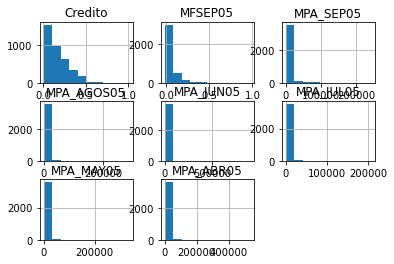

In [116]:
viz = rlm1[["Credito","MFSEP05","MPA_SEP05","MPA_AGOS05","MPA_JUN05","MPA_JUL05",
"MPA_MAY05","MPA_ABR05"]]
viz.hist()
plt.show()

In [117]:
msk = np.random.rand(len(rlm1)) < 0.8 
train = rlm1[msk] 
test = rlm1[~msk]

In [118]:
from sklearn import linear_model
rlm1 = linear_model.LinearRegression()
x = np.asanyarray(train[["Credito","MFSEP05","MPA_SEP05","MPA_AGOS05","MPA_JUN05","MPA_JUL05",
"MPA_MAY05","MPA_ABR05"]])
y = np.asanyarray(train[["Credito"]])
rlm1.fit (x, y)
# The coefficients
print ('Coefficients: ',rlm1.coef_)

Coefficients:  [[ 1.00000000e+00  1.83765592e-16  1.66215823e-17 -1.49733354e-17
  -2.30508547e-17  8.04382107e-17  2.51975580e-18 -1.33247265e-17]]


In [119]:
y_hat= rlm1.predict(test[["Credito","MFSEP05","MPA_SEP05","MPA_AGOS05","MPA_JUN05","MPA_JUL05",
"MPA_MAY05","MPA_ABR05"]])
x = np.asanyarray(test[["Credito","MFSEP05","MPA_SEP05","MPA_AGOS05","MPA_JUN05","MPA_JUL05",
"MPA_MAY05","MPA_ABR05"]])
y = np.asanyarray(test[["Credito"]])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % rlm1.score(x, y))

Residual sum of squares: 0.00
Variance score: 1.00


C:\Users\Meizon Sanchez\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [120]:
df4 = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_hat.flatten()})
df4.head(10)

,Actual,Predicted
0,50000,50000.0
1,140000,140000.0
2,630000,630000.0
3,130000,130000.0
4,120000,120000.0
5,70000,70000.0
6,50000,50000.0
7,160000,160000.0
8,360000,360000.0
9,40000,40000.0


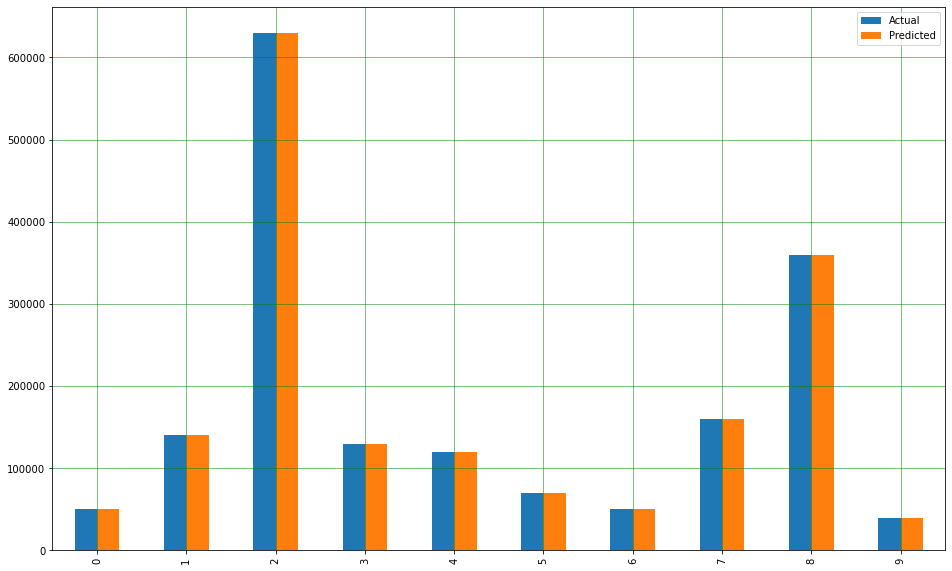

In [121]:
df5 = df4.head(10)
df5.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [122]:
#Creando un nuevo dataframe para el modelo de Regresion Lineal simple
rlscmf=corcredit[["Credito","MFSEP05"]]
rlscmf.head()

,Credito,MFSEP05
1,20000,3913
2,120000,2682
3,90000,29239
4,50000,46990
5,50000,8617


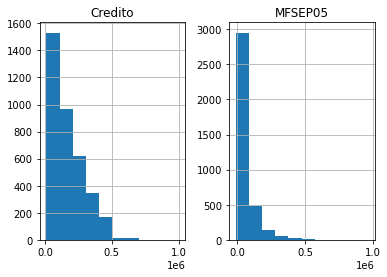

In [123]:
viz =rlscmf[['Credito',"MFSEP05"]]
viz.hist()
plt.show()

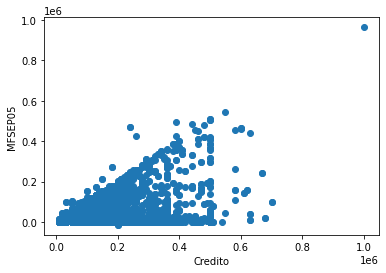

In [124]:
plt.scatter(credit["Credito"],credit["MFSEP05"])
plt.xlabel("Credito")
plt.ylabel("MFSEP05")
plt.show()

In [125]:
msk = np.random.rand(len(rlscmf)) < 0.8 #Esto selecciona aleatoriamente el 80% de las observaciones y la amacena en msk
train = rlscmf[msk] #aca se indica que el set de entrenamiento esta conformado por el 80% de las observaciones
test = rlscmf[~msk]

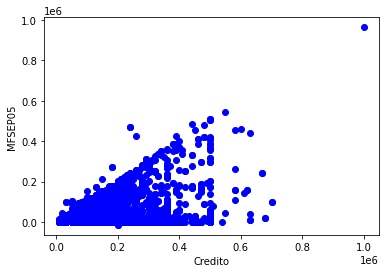

In [126]:
plt.scatter(train.Credito, train.MFSEP05,  color='blue')
plt.xlabel("Credito")
plt.ylabel("MFSEP05")
plt.show()

In [127]:
rlscmf= linear_model.LinearRegression()
train_x = np.asanyarray(train[['Credito']])
train_y = np.asanyarray(train[["MFSEP05"]])
rlscmf.fit(train_x, train_y)
# Obtener coeficientes de resultados, estos datos son informativos.
print ('Coefficients: ', rlscmf.coef_)
print ('Intercept: ',rlscmf.intercept_)

Coefficients:  [[0.21996529]]
Intercept:  [15812.54014004]


Text(0, 0.5, 'MFSEP05')

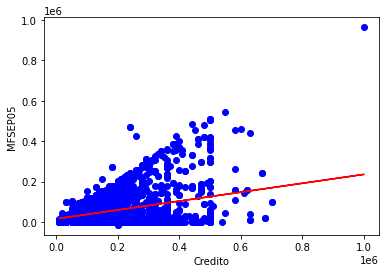

In [128]:
plt.scatter(train.Credito, train.MFSEP05,  color='blue')
plt.plot(train_x, rlscmf.coef_[0][0]*train_x + rlscmf.intercept_[0], '-r')
plt.xlabel("Credito")
plt.ylabel("MFSEP05")

In [129]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Credito']])
test_y = np.asanyarray(test[["MFSEP05"]])
test_y_ = rlscmf.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 47418.27
Residual sum of squares (MSE): 4401285166.76
R2-score: 0.03


In [130]:
dfcmf = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_hat.flatten()})
dfcmf.head(10)

,Actual,Predicted
0,50000,50000.0
1,140000,140000.0
2,630000,630000.0
3,130000,130000.0
4,120000,120000.0
5,70000,70000.0
6,50000,50000.0
7,160000,160000.0
8,360000,360000.0
9,40000,40000.0


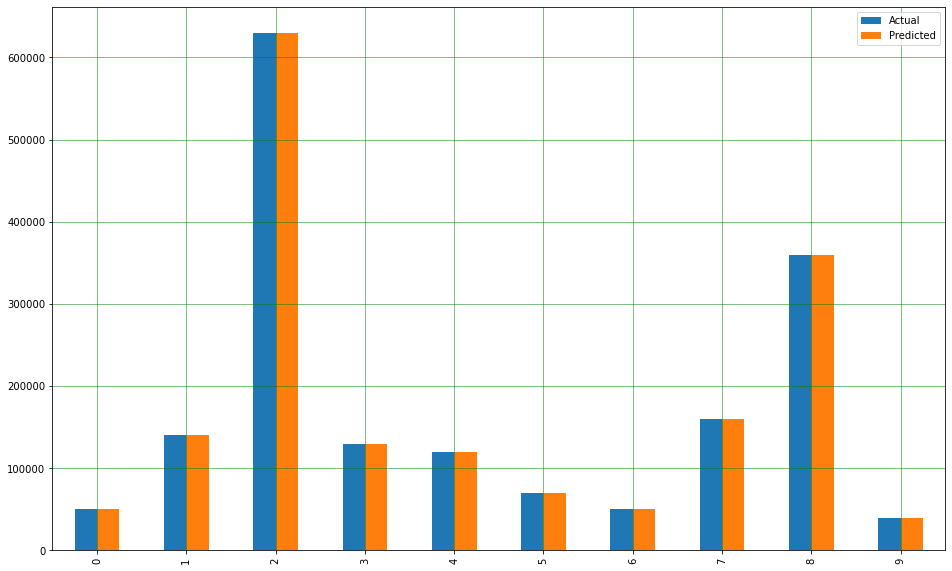

In [131]:
dfcmf1 = dfcmf.head(10)
dfcmf1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()